In [1]:
import matplotlib.pyplot as plt
import seaborn           as sns
import pandas            as pd
import numpy             as np

In [138]:
fontsize = 18

colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#8bd3c7"]

In [3]:
df = pd.read_csv("./grid_results.csv")
df

,n_workers,n_threads,load_time,rotation_time,mapping_time,compute_time,total_time
0,1,8,12.617675,0.026809,0.001489,14.596029,27.242357
1,1,7,10.980205,0.020068,0.001324,14.149490,25.152314
2,1,6,11.064290,0.020224,0.001274,13.285676,24.372086
3,1,5,9.479378,0.019058,0.001214,13.029329,22.530997
4,1,4,9.319416,0.019973,0.005122,12.924639,22.269490
...,...,...,...,...,...,...,...
59,8,5,8.057083,0.021041,0.000930,6.195173,14.274738
60,8,4,8.163486,0.018986,0.000982,6.135245,14.319311
61,8,3,8.386006,0.020056,0.000630,5.951200,14.358195
62,8,2,8.167397,0.019887,0.000882,5.826564,14.015440


In [4]:
df.describe()

,n_workers,n_threads,load_time,rotation_time,mapping_time,compute_time,total_time
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,4.500000,4.500000,7.459246,0.020209,0.001421,6.293391,13.774890
std,2.309401,2.309401,1.600598,0.001086,0.001580,3.041857,3.958714
min,1.000000,1.000000,5.520698,0.018667,0.000630,3.560961,9.247528
25%,2.750000,2.750000,5.789965,0.019728,0.000877,4.329972,12.184961
50%,4.500000,4.500000,8.015487,0.020077,0.000952,5.413386,12.854333
75%,6.250000,6.250000,8.455482,0.020379,0.001234,6.642966,14.008376
max,8.000000,8.000000,12.617675,0.026809,0.009307,18.203794,27.242357


## Heatmaps

In [57]:
load_time_matrix     = df.pivot("n_workers", "n_threads", "load_time")
rotation_time_matrix = df.pivot("n_workers", "n_threads", "rotation_time")
mapping_time_matrix  = df.pivot("n_workers", "n_threads", "mapping_time")
compute_time_matrix  = df.pivot("n_workers", "n_threads", "compute_time")
total_time_matrix    = df.pivot("n_workers", "n_threads", "total_time")

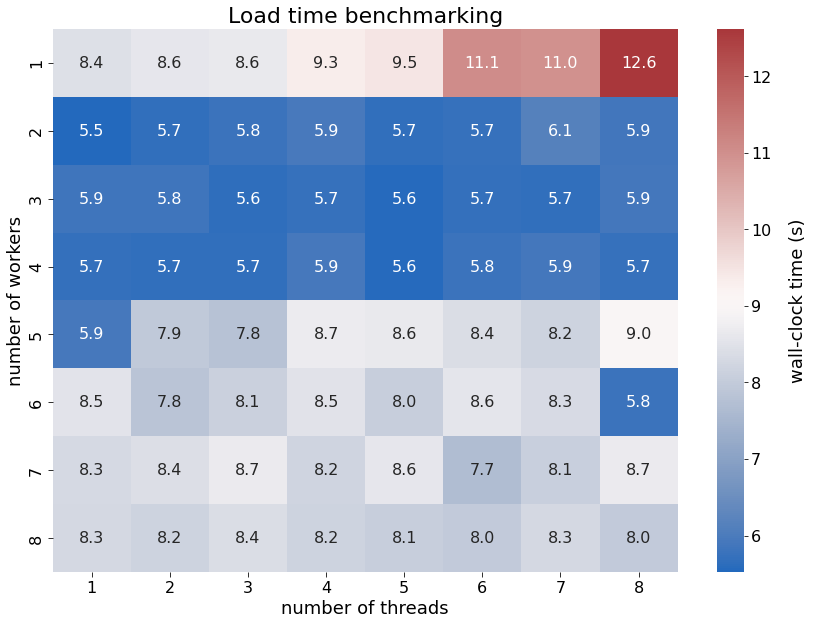

In [116]:
fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(1, 1, 1)

sns.heatmap(
    data      = load_time_matrix, 
    annot     = True, 
    annot_kws = {"fontsize": fontsize - 2},
    fmt       = ".1f",
    cbar      = True,
    cmap      = sns.color_palette("vlag", as_cmap=True),
    ax        = ax,
)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = fontsize - 2)
cbar.ax.get_yaxis().labelpad = fontsize
cbar.ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)

ax.set_title("Load time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of threads", fontsize = fontsize)
ax.set_ylabel("number of workers", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

# fig.savefig("plots/heatmaps/load_time_hm.svg", facecolor="white", dpi=300)
plt.show()

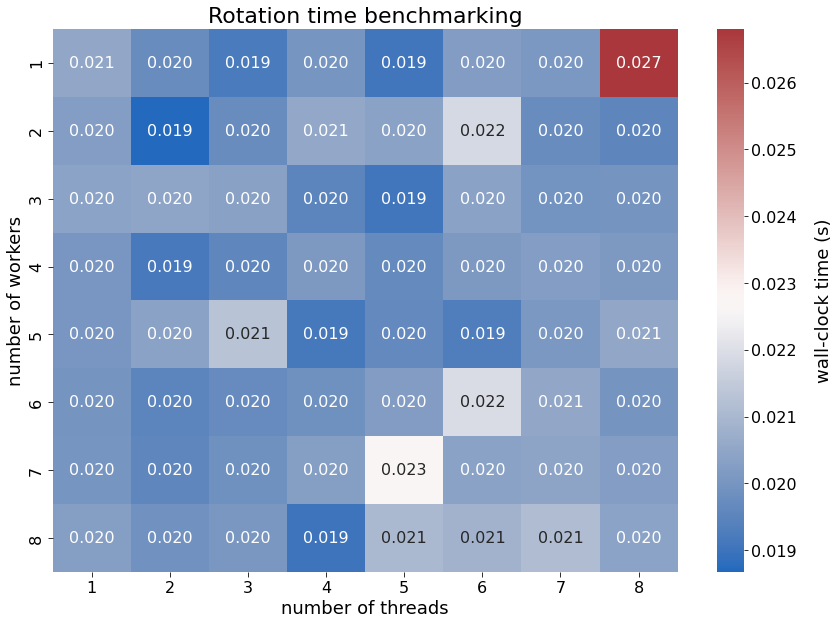

In [117]:
fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(1, 1, 1)

sns.heatmap(
    data      = rotation_time_matrix, 
    annot     = True, 
    annot_kws = {"fontsize": fontsize - 2},
    fmt       = ".3f",
    cbar      = True,
    cmap      = sns.color_palette("vlag", as_cmap=True),
    ax        = ax,
)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = fontsize - 2)
cbar.ax.get_yaxis().labelpad = fontsize
cbar.ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)

ax.set_title("Rotation time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of threads", fontsize = fontsize)
ax.set_ylabel("number of workers", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)


# fig.savefig("plots/heatmaps/rotation_time_hm.svg", facecolor="white", dpi=300)
plt.show()

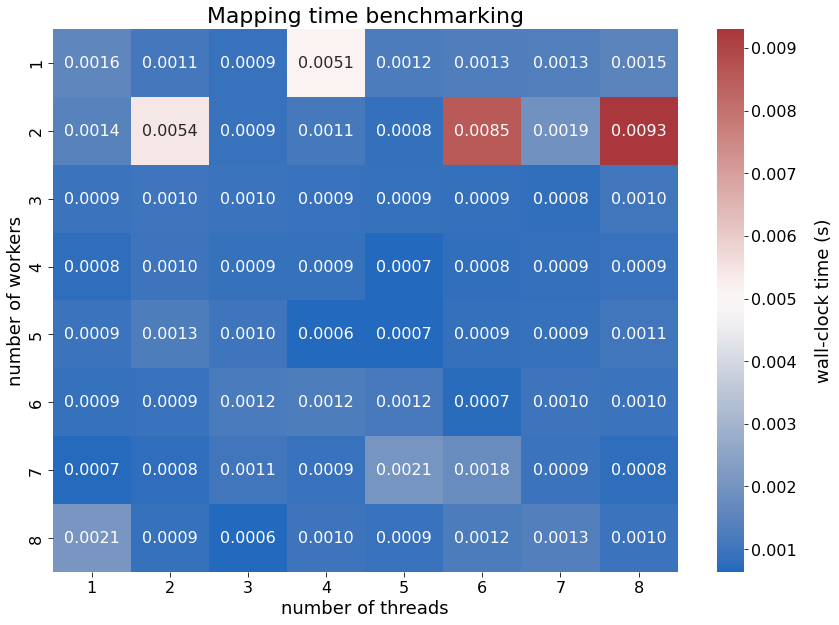

In [118]:
fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(1, 1, 1)

sns.heatmap(
    data      = mapping_time_matrix, 
    annot     = True, 
    annot_kws = {"fontsize": fontsize - 2},
    fmt       = ".4f",
    cbar      = True,
    cmap      = sns.color_palette("vlag", as_cmap=True),
    ax        = ax,
)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = fontsize - 2)
cbar.ax.get_yaxis().labelpad = fontsize
cbar.ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)

ax.set_title("Mapping time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of threads", fontsize = fontsize)
ax.set_ylabel("number of workers", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)


# fig.savefig("plots/heatmaps/mapping_time_hm.svg", facecolor="white", dpi=300)
plt.show()

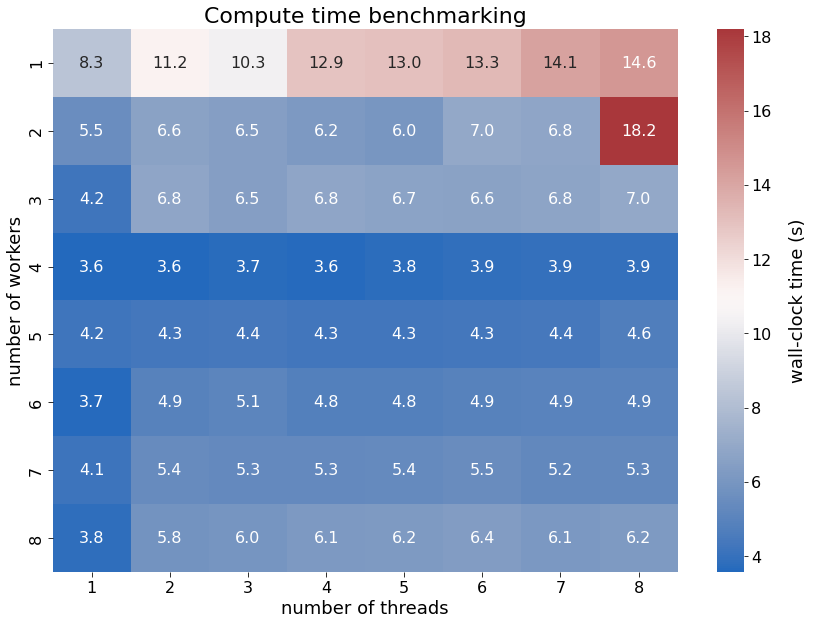

In [119]:
fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(1, 1, 1)

sns.heatmap(
    data      = compute_time_matrix, 
    annot     = True, 
    annot_kws = {"fontsize": fontsize - 2},
    fmt       = ".1f",
    cbar      = True,
    cmap      = sns.color_palette("vlag", as_cmap=True),
    ax        = ax,
)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = fontsize - 2)
cbar.ax.get_yaxis().labelpad = fontsize
cbar.ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)

ax.set_title("Compute time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of threads", fontsize = fontsize)
ax.set_ylabel("number of workers", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)


# fig.savefig("plots/heatmaps/compute_time_hm.svg", facecolor="white", dpi=300)
plt.show()

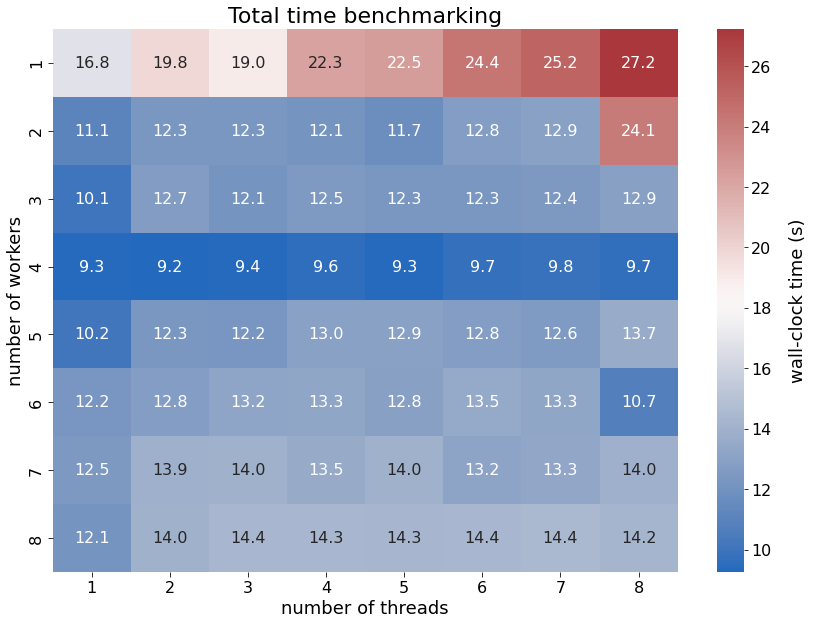

In [120]:
fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(1, 1, 1)

sns.heatmap(
    data      = total_time_matrix, 
    annot     = True, 
    annot_kws = {"fontsize": fontsize - 2},
    fmt       = ".1f",
    cbar      = True,
    cmap      = sns.color_palette("vlag", as_cmap=True),
    ax        = ax,
)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize = fontsize - 2)
cbar.ax.get_yaxis().labelpad = fontsize
cbar.ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)

ax.set_title("Total time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of threads", fontsize = fontsize)
ax.set_ylabel("number of workers", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)



# fig.savefig("plots/heatmaps/total_time_hm.svg", facecolor="white", dpi=300)
plt.show()

## Trends

### Time vs threads

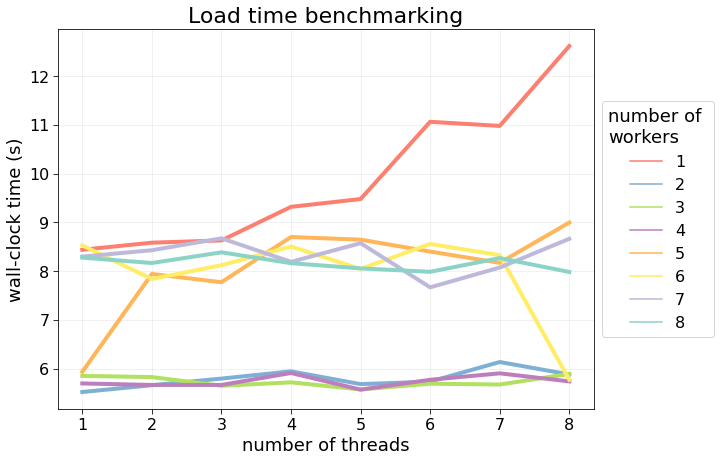

In [171]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_threads",
    y         = "load_time",
    hue       = "n_workers",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Load time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of threads", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nworkers",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


# fig.savefig("plots/trends/load_time_threads_trend.svg", facecolor="white", dpi=300)
plt.show()

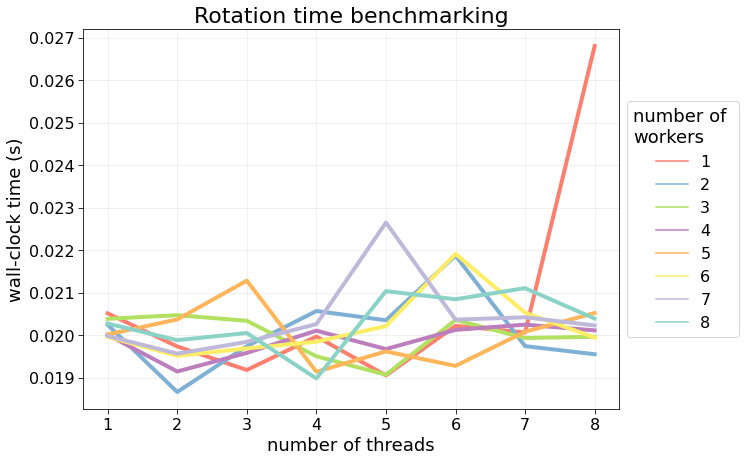

In [172]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_threads",
    y         = "rotation_time",
    hue       = "n_workers",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Rotation time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of threads", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nworkers",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


# fig.savefig("plots/trends/rotation_time_threads_trend.svg", facecolor="white", dpi=300)
plt.show()

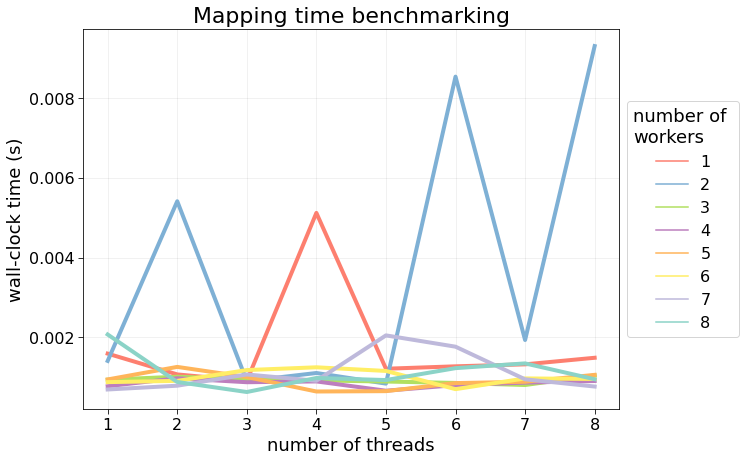

In [173]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_threads",
    y         = "mapping_time",
    hue       = "n_workers",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Mapping time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of threads", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nworkers",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


# fig.savefig("plots/trends/mapping_time_threads_trend.svg", facecolor="white", dpi=300)
plt.show()

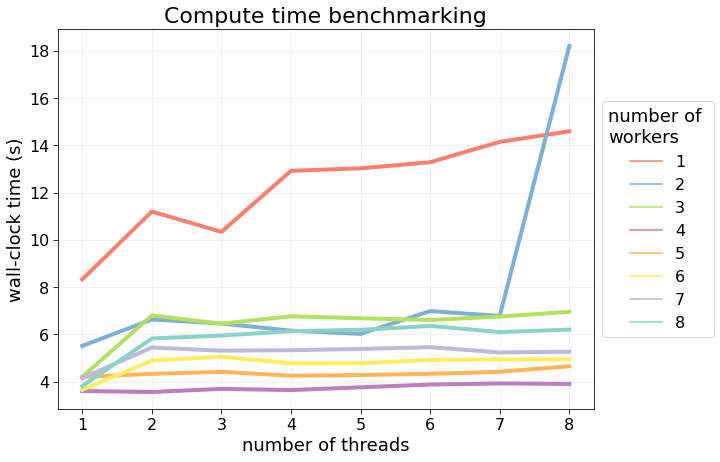

In [174]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_threads",
    y         = "compute_time",
    hue       = "n_workers",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Compute time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of threads", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nworkers",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


# fig.savefig("plots/trends/compute_time_threads_trend.svg", facecolor="white", dpi=300)
plt.show()

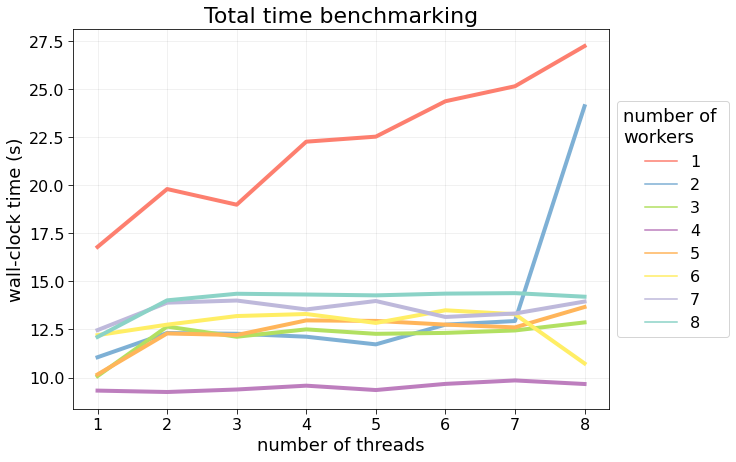

In [175]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_threads",
    y         = "total_time",
    hue       = "n_workers",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Total time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of threads", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nworkers",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


# fig.savefig("plots/trends/total_time_threads_trend.svg", facecolor="white", dpi=300)
plt.show()

### Time vs workers

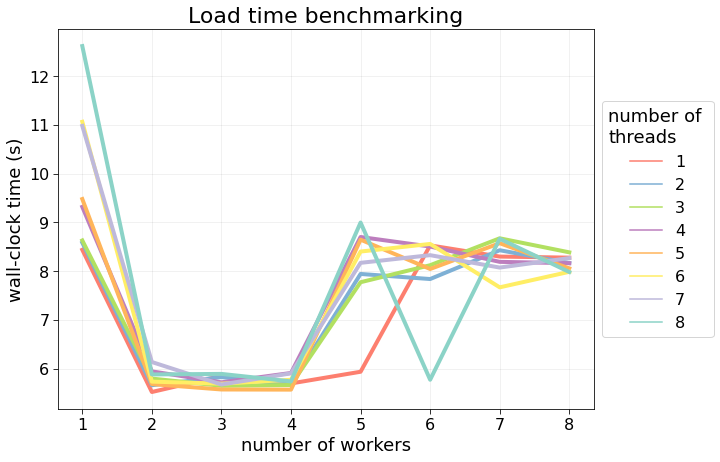

In [176]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_workers",
    y         = "load_time",
    hue       = "n_threads",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Load time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of workers", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nthreads",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


# fig.savefig("plots/trends/load_time_workers_trend.svg", facecolor="white", dpi=300)
plt.show()

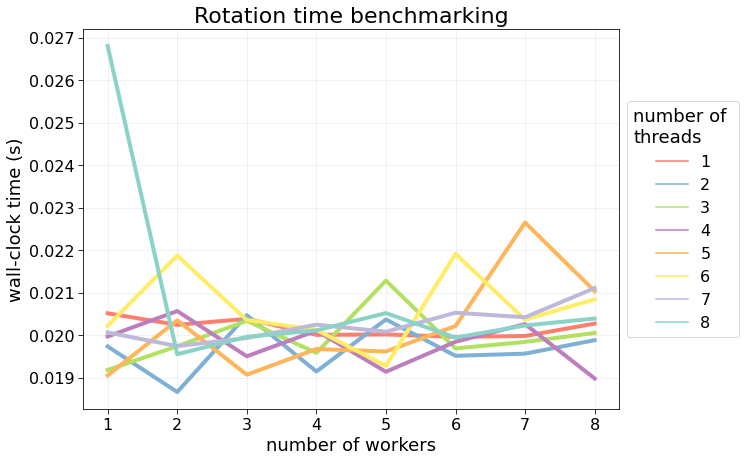

In [177]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_workers",
    y         = "rotation_time",
    hue       = "n_threads",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Rotation time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of workers", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nthreads",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


# fig.savefig("plots/trends/rotation_time_workers_trend.svg", facecolor="white", dpi=300)
plt.show()

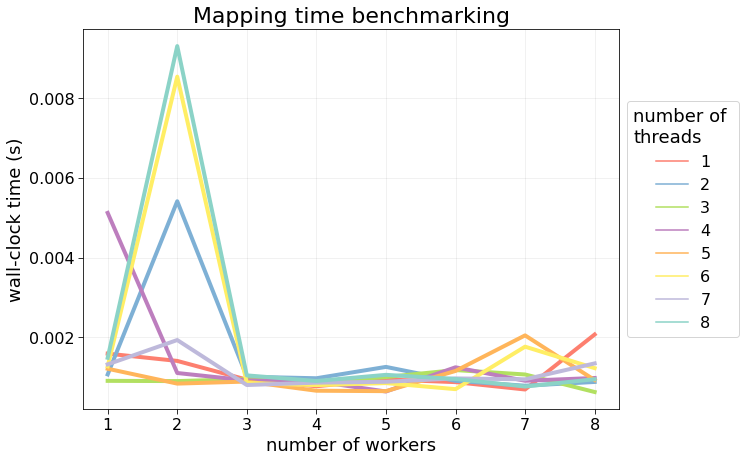

In [178]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_workers",
    y         = "mapping_time",
    hue       = "n_threads",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Mapping time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of workers", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nthreads",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


# fig.savefig("plots/trends/mapping_time_workers_trend.svg", facecolor="white", dpi=300)
plt.show()

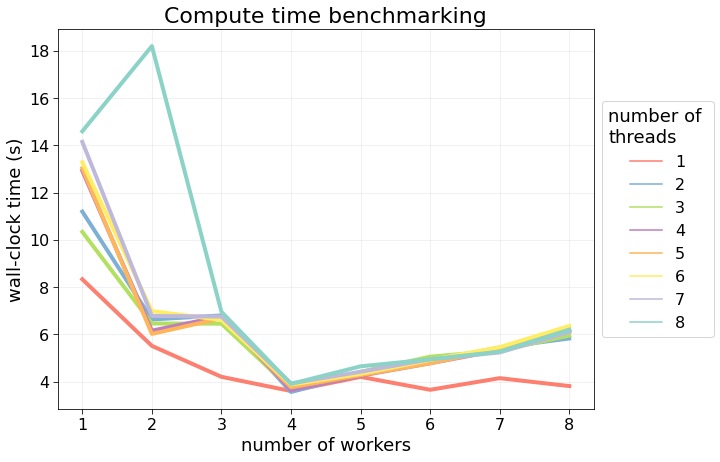

In [179]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_workers",
    y         = "compute_time",
    hue       = "n_threads",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Compute time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of workers", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nthreads",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


# fig.savefig("plots/trends/compute_time_workers_trend.svg", facecolor="white", dpi=300)
plt.show()

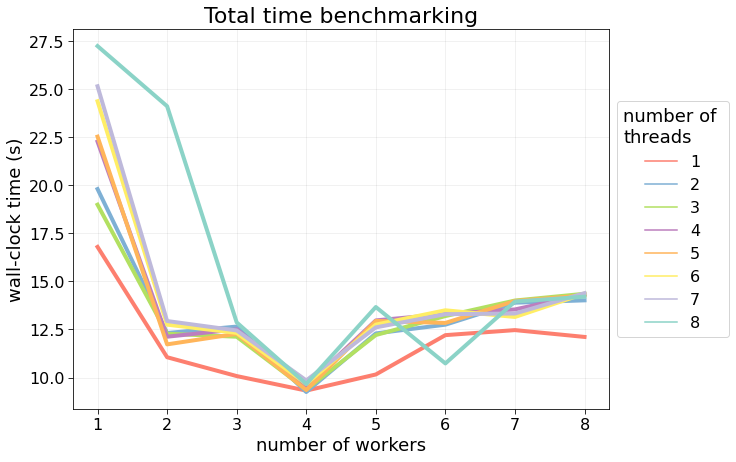

In [180]:
fig = plt.figure(figsize=(12,7))

ax = fig.add_subplot(1, 1, 1)
ax.grid(color = "black", alpha = 0.07)

sns.lineplot(
    data = df,
    x         = "n_workers",
    y         = "total_time",
    hue       = "n_threads",
    palette   = colors,
    linewidth = 4,
    ax        = ax,
    legend    = "full",
)
ax.set_title("Total time benchmarking", fontsize = fontsize + 4)
ax.set_xlabel("number of workers", fontsize = fontsize)
ax.set_ylabel("wall-clock time (s)", fontsize = fontsize)
ax.tick_params(axis = "both", which = "major", labelsize = fontsize - 2, length=5)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(title="number of \nthreads",loc="center left", bbox_to_anchor=(1, 0.5), fontsize = fontsize-2, title_fontsize=fontsize)


# fig.savefig("plots/trends/total_time_workers_trend.svg", facecolor="white", dpi=300)
plt.show()